In [2]:
pip install yfinance

     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     --- ------------------------------------ 0.3/3.0 MB ? eta -:--:--
     ------ --------------------------------- 0.5/3.0 MB 1.7 MB/s eta 0:00:02
     ------------- -------------------------- 1.0/3.0 MB 1.7 MB/s eta 0:00:02
     ------------- -------------------------- 1.0/3.0 MB 1.7 MB/s eta 0:00:02
     ------------- -------------------------- 1.0/3.0 MB 1.7 MB/s eta 0:00:02
     ------------- -------------------------- 1.0/3.0 MB 1.7 MB/s eta 0:00:02
     ------------- -------------------------- 1.0/3.0 MB 1.7 MB/s eta 0:00:02
     ----------------- ---------------------- 1.3/3.0 MB 691.7 kB/s eta 0:00:03
     -------------------- ------------------- 1.6/3.0 MB 798.7 kB/s eta 0:00:02
     ------------------------ --------------- 1.8/3.0 MB 867.5 kB/s eta 0:00:02
     --------------------------- ------------ 2.1/3.0 MB 896.4 kB/s eta 0:00:02

In [10]:
import yfinance as yf
import pandas as pd

# Define the list of stock tickers
tickers = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA','MS','SREN.SW']

# Download historical price data (of last 5 years)
data = yf.download(tickers, start='2019-01-01', end='2024-01-01')['Adj Close']
print(data.head())


[*********************100%***********************]  7 of 7 completed


Ticker                          AAPL       AMZN      GOOGL         MS  \
Date                                                                    
2019-01-02 00:00:00+00:00  37.750080  76.956497  52.603748  33.665997   
2019-01-03 00:00:00+00:00  33.989899  75.014000  51.146851  33.066017   
2019-01-04 00:00:00+00:00  35.440899  78.769501  53.770355  34.415989   
2019-01-07 00:00:00+00:00  35.362015  81.475502  53.663120  34.757656   
2019-01-08 00:00:00+00:00  36.036140  82.829002  54.134453  34.540977   

Ticker                          MSFT    SREN.SW       TSLA  
Date                                                        
2019-01-02 00:00:00+00:00  95.501328        NaN  20.674667  
2019-01-03 00:00:00+00:00  91.988037  60.072948  20.024000  
2019-01-04 00:00:00+00:00  96.266304  61.006374  21.179333  
2019-01-07 00:00:00+00:00  96.389091  60.819691  22.330667  
2019-01-08 00:00:00+00:00  97.087959  60.886364  22.356667  


In [11]:
# Reset the index to make 'Date' a column
data_reset = data.reset_index()

# Display the first few rows of the DataFrame
print(data_reset.head())


Ticker                      Date       AAPL       AMZN      GOOGL         MS  \
0      2019-01-02 00:00:00+00:00  37.750080  76.956497  52.603748  33.665997   
1      2019-01-03 00:00:00+00:00  33.989899  75.014000  51.146851  33.066017   
2      2019-01-04 00:00:00+00:00  35.440899  78.769501  53.770355  34.415989   
3      2019-01-07 00:00:00+00:00  35.362015  81.475502  53.663120  34.757656   
4      2019-01-08 00:00:00+00:00  36.036140  82.829002  54.134453  34.540977   

Ticker       MSFT    SREN.SW       TSLA  
0       95.501328        NaN  20.674667  
1       91.988037  60.072948  20.024000  
2       96.266304  61.006374  21.179333  
3       96.389091  60.819691  22.330667  
4       97.087959  60.886364  22.356667  


In [12]:
from IPython.display import display

# Display DataFrame with better formatting
display(data_reset)
# Drop rows with any NaN values
data_cleaned = data.dropna()

# Fill NaN values with the previous value in the column (backward fill)
data_filled = data.fillna(method='bfill')

# Display cleaned data
display(data_cleaned)


Ticker,Date,AAPL,AMZN,GOOGL,MS,MSFT,SREN.SW,TSLA
0,2019-01-02 00:00:00+00:00,37.750080,76.956497,52.603748,33.665997,95.501328,NaN,20.674667
1,2019-01-03 00:00:00+00:00,33.989899,75.014000,51.146851,33.066017,91.988037,60.072948,20.024000
2,2019-01-04 00:00:00+00:00,35.440899,78.769501,53.770355,34.415989,96.266304,61.006374,21.179333
3,2019-01-07 00:00:00+00:00,35.362015,81.475502,53.663120,34.757656,96.389091,60.819691,22.330667
4,2019-01-08 00:00:00+00:00,36.036140,82.829002,54.134453,34.540977,97.087959,60.886364,22.356667
...,...,...,...,...,...,...,...,...
1284,2023-12-22 00:00:00+00:00,192.868149,153.419998,141.140518,89.867233,372.543915,89.640778,252.539993
1285,2023-12-26 00:00:00+00:00,192.320221,153.410004,141.170441,90.285393,372.623505,NaN,256.609985
1286,2023-12-27 00:00:00+00:00,192.419830,153.339996,140.023270,91.082840,372.036713,89.097504,261.440002
1287,2023-12-28 00:00:00+00:00,192.848206,153.380005,139.883621,91.063385,373.240112,88.217018,253.179993


<ipython-input-12-17f00d8d13cd>:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_filled = data.fillna(method='bfill')


Ticker,AAPL,AMZN,GOOGL,MS,MSFT,SREN.SW,TSLA
Date,,,,,,,
2019-01-03 00:00:00+00:00,33.989899,75.014000,51.146851,33.066017,91.988037,60.072948,20.024000
2019-01-04 00:00:00+00:00,35.440899,78.769501,53.770355,34.415989,96.266304,61.006374,21.179333
2019-01-07 00:00:00+00:00,35.362015,81.475502,53.663120,34.757656,96.389091,60.819691,22.330667
2019-01-08 00:00:00+00:00,36.036140,82.829002,54.134453,34.540977,97.087959,60.886364,22.356667
2019-01-09 00:00:00+00:00,36.648087,82.971001,53.948914,34.782646,98.476303,61.353081,22.568666
...,...,...,...,...,...,...,...
2023-12-21 00:00:00+00:00,193.944031,153.839996,140.073151,90.081177,371.509613,89.303566,254.500000
2023-12-22 00:00:00+00:00,192.868149,153.419998,141.140518,89.867233,372.543915,89.640778,252.539993
2023-12-27 00:00:00+00:00,192.419830,153.339996,140.023270,91.082840,372.036713,89.097504,261.440002


In [13]:
data.describe()


Ticker,AAPL,AMZN,GOOGL,MS,MSFT,SREN.SW,TSLA
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1260.000000,1258.000000
mean,121.109185,127.649705,97.950464,64.702001,230.511678,70.307488,170.887469
std,46.641348,31.209475,29.618948,21.332978,73.058734,10.299877,108.304521
min,33.989899,75.014000,51.146851,24.004356,91.988037,38.570580,11.931333
25%,75.105932,95.441999,69.608891,42.014581,167.160671,64.410860,49.886168
50%,132.156395,127.125000,99.723076,73.336407,238.135239,69.515606,200.313332
75%,157.614861,158.093746,124.332134,82.335749,286.826721,76.762398,251.844997
max,197.361084,186.570496,149.468399,99.019386,380.619812,96.759590,409.970001


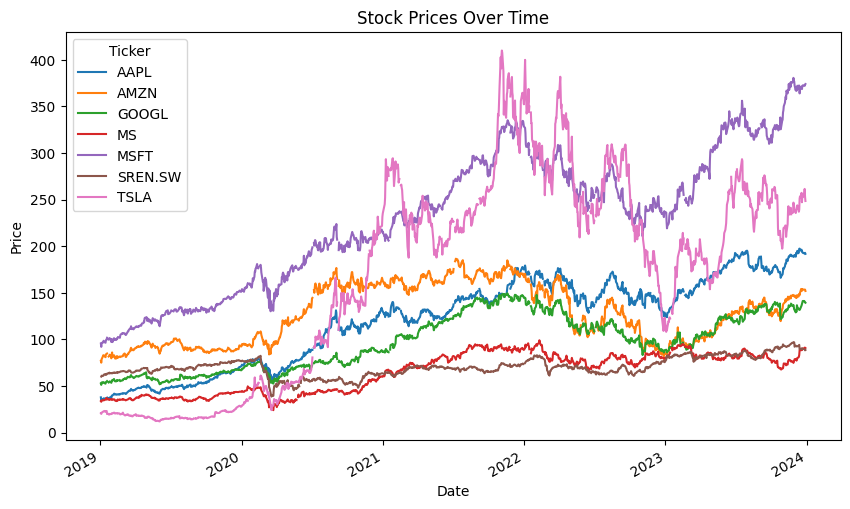

In [14]:
import matplotlib.pyplot as plt

# Plot stock prices over time
data.plot(figsize=(10, 6))
plt.title("Stock Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()


In [15]:
# Calculate daily percentage returns
returns = data.pct_change().dropna()

# First few rows of the returns
returns.head()

<ipython-input-15-ca9567beb0eb>:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = data.pct_change().dropna()


Ticker,AAPL,AMZN,GOOGL,MS,MSFT,SREN.SW,TSLA
Date,,,,,,,
2019-01-04 00:00:00+00:00,0.042689,0.050064,0.051294,0.040827,0.046509,0.015538,0.057697
2019-01-07 00:00:00+00:00,-0.002226,0.034353,-0.001994,0.009928,0.001275,-0.003060,0.054361
2019-01-08 00:00:00+00:00,0.019064,0.016612,0.008783,-0.006234,0.007250,0.001096,0.001164
2019-01-09 00:00:00+00:00,0.016981,0.001714,-0.003427,0.006997,0.014300,0.007665,0.009483
2019-01-10 00:00:00+00:00,0.003196,-0.001928,-0.002607,-0.001917,-0.006426,0.014562,0.019023


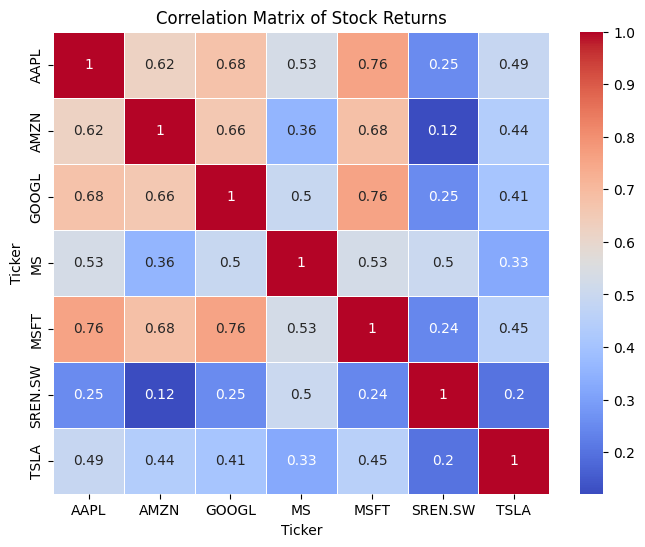

In [16]:
# Calculate the correlation matrix between stock returns
corr_matrix = returns.corr()

# Plotting a heatmap for visualizing correlations
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Stock Returns")
plt.show()

In [17]:
import numpy as np

# Number of portfolios to simulate
num_portfolios = 50000
results = np.zeros((4, num_portfolios))

# Array to store portfolio weights
weights_record = []

# Simulate random portfolios
for i in range(num_portfolios):
    # Generate random portfolio weights
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)  # Normalize weights

    # Store weights
    weights_record.append(weights)

    # Expected portfolio return (annualized)
    portfolio_return = np.sum(returns.mean() * weights * 252)

    # Expected portfolio volatility (annualized)
    portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))

    # Sharpe ratio (risk-adjusted return)
    sharpe_ratio = portfolio_return / portfolio_stddev

    # Store the results: volatility, return, sharpe ratio, index
    results[0, i] = portfolio_stddev
    results[1, i] = portfolio_return
    results[2, i] = sharpe_ratio
    results[3, i] = i  # Store index for reference


In [18]:
# Convert results to DataFrame for easy analysis
results_df = pd.DataFrame(results.T, columns=['Volatility', 'Return', 'Sharpe Ratio', 'Index'])

# Get the portfolio with the maximum Sharpe ratio
max_sharpe_port = results_df.iloc[results_df['Sharpe Ratio'].idxmax()]

# Get the portfolio with the minimum volatility
min_vol_port = results_df.iloc[results_df['Volatility'].idxmin()]

print("Max Sharpe Ratio Portfolio:\n", max_sharpe_port)
print("Min Volatility Portfolio:\n", min_vol_port)


Max Sharpe Ratio Portfolio:
 Volatility          0.293962
Return              0.393863
Sharpe Ratio        1.339845
Index           12946.000000
Name: 12946, dtype: float64
Min Volatility Portfolio:
 Volatility          0.214314
Return              0.193901
Sharpe Ratio        0.904756
Index           14078.000000
Name: 14078, dtype: float64


In [19]:
from scipy.stats import norm

# Assuming daily returns are normally distributed
mean = returns.mean()
stddev = returns.std()

# Calculate 5% Value at Risk (95% confidence level)
confidence_level = 0.05
VaR_95 = norm.ppf(1 - confidence_level) * stddev

print(f"5% VaR for each stock:\n{VaR_95}")


5% VaR for each stock:
Ticker
AAPL       0.032683
AMZN       0.036048
GOOGL      0.032548
MS         0.036161
MSFT       0.031176
SREN.SW    0.027018
TSLA       0.066238
dtype: float64


Portfolio Optimization Tool
--------------------------------------------------


Enter stock tickers separated by commas (e.g., AAPL, MSFT, TSLA or RELIANCE.NS, TCS.NS):  RELIANCE.NS,INFY.NS,ICICIBANK.NS,HDFCBANK.NS,BHARTIARTL.NS
Enter the start date (YYYY-MM-DD):  2019-1-1



Fetching stock data...


[*********************100%***********************]  5 of 5 completed



Enter the number of shares you own for each stock:


RELIANCE.NS:  2
INFY.NS:  3
ICICIBANK.NS:  2
HDFCBANK.NS:  4
BHARTIARTL.NS:  6



Portfolio Analysis Results
--------------------------------------------------

Optimal Portfolio Weights:
RELIANCE.NS: 22.49%
INFY.NS: 27.90%
ICICIBANK.NS: 3.24%
HDFCBANK.NS: 28.36%
BHARTIARTL.NS: 18.00%

Current Portfolio Status and Rebalancing Needed:

RELIANCE.NS (INR):
Current Value: ₹2,433.10
Target Value: ₹6,212.76
Buy 3 shares

INFY.NS (INR):
Current Value: ₹5,589.45
Target Value: ₹7,707.42
Buy 1 shares

ICICIBANK.NS (INR):
Current Value: ₹2,503.60
Target Value: ₹895.98
Sell 1 shares

HDFCBANK.NS (INR):
Current Value: ₹6,827.20
Target Value: ₹7,833.24

BHARTIARTL.NS (INR):
Current Value: ₹10,269.30
Target Value: ₹4,973.25
Sell 3 shares


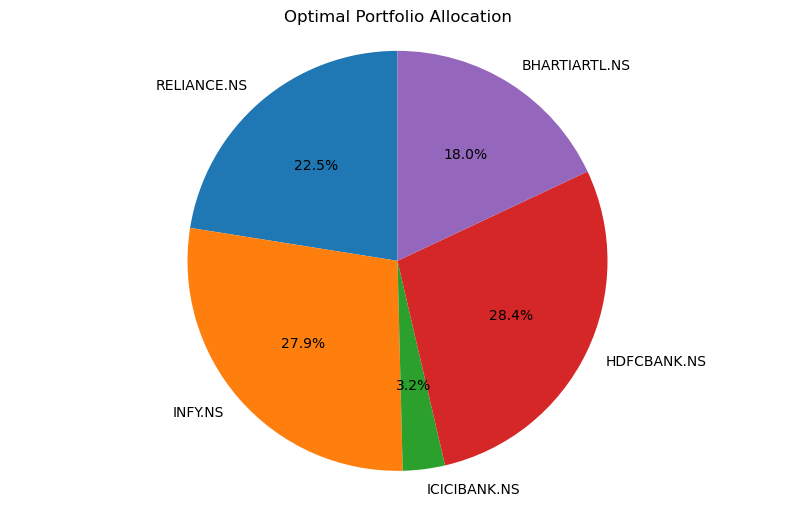

<Figure size 1200x600 with 0 Axes>

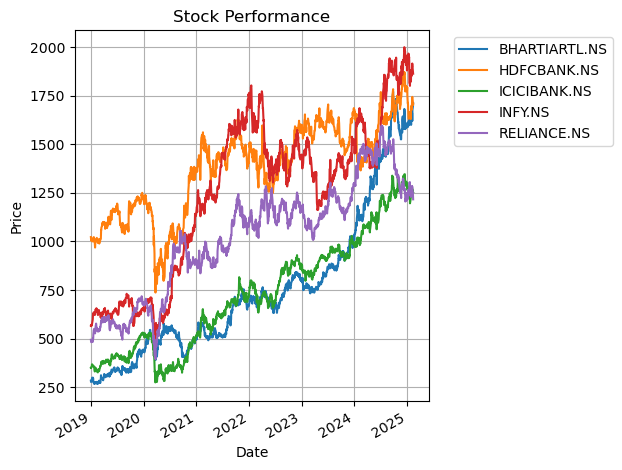

In [32]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from datetime import datetime

def validate_inputs(stocks, start_date):
    """Validate user inputs"""
    try:
        pd.to_datetime(start_date)
    except:
        raise ValueError("Invalid date format. Please use YYYY-MM-DD")
    
    if not stocks:
        raise ValueError("No stock tickers provided")

def calculate_portfolio_metrics(weights, mean_returns, cov_matrix):
    """Calculate portfolio return, volatility, and Sharpe ratio"""
    portfolio_return = np.sum(mean_returns * weights)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = portfolio_return / portfolio_volatility if portfolio_volatility != 0 else 0
    return portfolio_return, portfolio_volatility, sharpe_ratio

def minimize_volatility(weights):
    """Objective function to minimize portfolio volatility"""
    return calculate_portfolio_metrics(weights, mean_returns, cov_matrix)[1]

# Main program
print("Portfolio Optimization Tool")
print("-" * 50)

# Get user inputs
stocks_input = input("Enter stock tickers separated by commas (e.g., AAPL, MSFT, TSLA or RELIANCE.NS, TCS.NS): ")
stocks = [s.strip().upper() for s in stocks_input.split(',')]
start_date = input("Enter the start date (YYYY-MM-DD): ").strip()

# Validate inputs
validate_inputs(stocks, start_date)

# Separate Indian and US stocks
indian_stocks = [stock for stock in stocks if stock.endswith('.NS')]
us_stocks = [stock for stock in stocks if not stock.endswith('.NS')]

# Download data
print("\nFetching stock data...")
end_date = datetime.now().strftime('%Y-%m-%d')
data = yf.download(stocks, start=start_date, end=end_date)['Close']

if data.empty:
    raise ValueError("No data downloaded. Please check your stock tickers and date range.")

# Handle missing data
data = data.ffill().dropna()

# Calculate returns and risk metrics
returns = data.pct_change().dropna()
mean_returns = returns.mean() * 252
cov_matrix = returns.cov() * 252

# Get user's current holdings
print("\nEnter the number of shares you own for each stock:")
shares = {}
for stock in stocks:
    while True:
        try:
            shares[stock] = int(input(f"{stock}: "))
            break
        except ValueError:
            print("Please enter a valid number")

# Get current prices and calculate current portfolio value
current_prices = data.iloc[-1]
current_values = {}

# Calculate current values (keeping currencies separate)
for stock in indian_stocks:
    current_values[stock] = {
        'shares': shares[stock],
        'price': current_prices[stock],
        'value': shares[stock] * current_prices[stock],
        'currency': 'INR'
    }

for stock in us_stocks:
    current_values[stock] = {
        'shares': shares[stock],
        'price': current_prices[stock],
        'value': shares[stock] * current_prices[stock],
        'currency': 'USD'
    }

# Portfolio optimization
num_stocks = len(stocks)
initial_weights = np.ones(num_stocks) / num_stocks
bounds = tuple((0, 1) for _ in range(num_stocks))
constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})

# Find optimal weights
result = minimize(minimize_volatility, initial_weights, method='SLSQP',
                 bounds=bounds, constraints=constraints)
optimal_weights = result['x']

# Calculate target values (keeping currencies separate)
total_inr = sum(val['value'] for val in current_values.values() if val['currency'] == 'INR')
total_usd = sum(val['value'] for val in current_values.values() if val['currency'] == 'USD')

# Display results
print("\nPortfolio Analysis Results")
print("-" * 50)
print("\nOptimal Portfolio Weights:")
for stock, weight in zip(stocks, optimal_weights):
    print(f"{stock}: {weight:.2%}")

print("\nCurrent Portfolio Status and Rebalancing Needed:")
for stock, weight in zip(stocks, optimal_weights):
    current = current_values[stock]
    currency_symbol = '₹' if current['currency'] == 'INR' else '$'
    
    if current['currency'] == 'INR':
        target_value = weight * total_inr
    else:
        target_value = weight * total_usd
        
    shares_difference = int((target_value - current['value']) / current['price'])
    
    print(f"\n{stock} ({current['currency']}):")
    print(f"Current Value: {currency_symbol}{current['value']:,.2f}")
    print(f"Target Value: {currency_symbol}{target_value:,.2f}")
    
    if abs(shares_difference) > 0:
        action = "Buy" if shares_difference > 0 else "Sell"
        print(f"{action} {abs(shares_difference)} shares")

# Visualizations
plt.figure(figsize=(10, 6))
plt.pie(optimal_weights, labels=stocks, autopct='%1.1f%%', startangle=90)
plt.title("Optimal Portfolio Allocation")
plt.axis('equal')
plt.show()

# Performance visualization without normalization
plt.figure(figsize=(12, 6))
data.plot()
plt.title("Stock Performance")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()


In [ ]:
RELIANCE.NS,INFY.NS,ICICIBANK.NS,HDFCBANK.NS,BHARTIARTL.NS


Portfolio Optimization Tool
--------------------------------------------------


Enter stock tickers separated by commas (e.g., AAPL, MSFT, TSLA or RELIANCE.NS, TCS.NS):  AAPL, GOOGL, MSFT, AMZN, TSLA,MS
Enter the start date (YYYY-MM-DD):  2019-1-1



Fetching stock data...


[*********************100%***********************]  6 of 6 completed



Enter the number of shares you own for each stock:


AAPL:  30
GOOGL:  20
MSFT:  3
AMZN:  30
TSLA:  10
MS:  2



Portfolio Analysis Results
--------------------------------------------------

Optimal Portfolio Weights:
AAPL: 19.59%
GOOGL: 13.62%
MSFT: 16.34%
AMZN: 27.02%
TSLA: 23.44%
MS: 0.00%

Current Portfolio Status and Rebalancing Needed:

AAPL (USD):
Current Value: $7,106.10
Target Value: $4,409.67
Sell 11 shares

GOOGL (USD):
Current Value: $3,672.20
Target Value: $3,066.98
Sell 3 shares

MSFT (USD):
Current Value: $1,227.12
Target Value: $3,677.67
Buy 5 shares

AMZN (USD):
Current Value: $6,867.90
Target Value: $6,081.84
Sell 3 shares

TSLA (USD):
Current Value: $3,365.10
Target Value: $5,276.48
Buy 5 shares

MS (USD):
Current Value: $274.22
Target Value: $0.00
Sell 1 shares


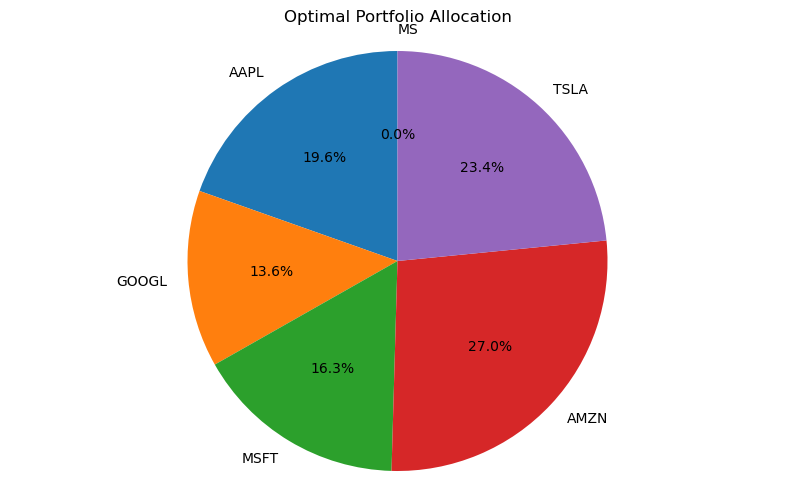

<Figure size 1200x600 with 0 Axes>

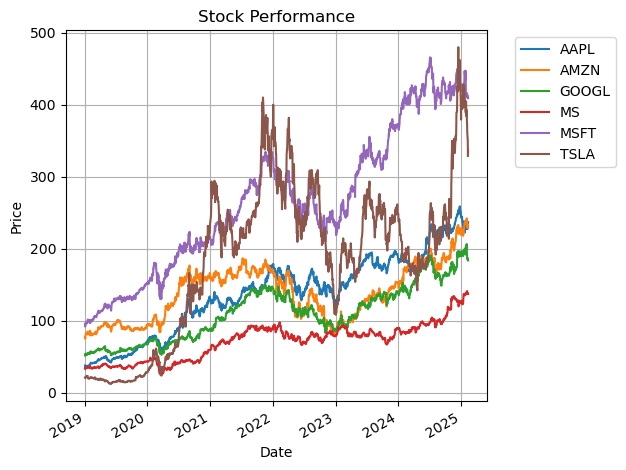

In [30]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from datetime import datetime

def validate_inputs(stocks, start_date):
    """Validate user inputs"""
    try:
        pd.to_datetime(start_date)
    except:
        raise ValueError("Invalid date format. Please use YYYY-MM-DD")
    
    if not stocks:
        raise ValueError("No stock tickers provided")

def calculate_portfolio_metrics(weights, mean_returns, cov_matrix):
    """Calculate portfolio return, volatility, and Sharpe ratio"""
    portfolio_return = np.sum(mean_returns * weights)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = portfolio_return / portfolio_volatility if portfolio_volatility != 0 else 0
    return portfolio_return, portfolio_volatility, sharpe_ratio

def minimize_volatility(weights):
    """Objective function to minimize portfolio volatility"""
    return calculate_portfolio_metrics(weights, mean_returns, cov_matrix)[1]

# Main program
print("Portfolio Optimization Tool")
print("-" * 50)

# Get user inputs
stocks_input = input("Enter stock tickers separated by commas (e.g., AAPL, MSFT, TSLA or RELIANCE.NS, TCS.NS): ")
stocks = [s.strip().upper() for s in stocks_input.split(',')]
start_date = input("Enter the start date (YYYY-MM-DD): ").strip()

# Validate inputs
validate_inputs(stocks, start_date)

# Separate Indian and US stocks
indian_stocks = [stock for stock in stocks if stock.endswith('.NS')]
us_stocks = [stock for stock in stocks if not stock.endswith('.NS')]

# Download data
print("\nFetching stock data...")
end_date = datetime.now().strftime('%Y-%m-%d')
data = yf.download(stocks, start=start_date, end=end_date)['Close']

if data.empty:
    raise ValueError("No data downloaded. Please check your stock tickers and date range.")

# Handle missing data
data = data.ffill().dropna()

# Calculate returns and risk metrics
returns = data.pct_change().dropna()
mean_returns = returns.mean() * 252
cov_matrix = returns.cov() * 252

# Get user's current holdings
print("\nEnter the number of shares you own for each stock:")
shares = {}
for stock in stocks:
    while True:
        try:
            shares[stock] = int(input(f"{stock}: "))
            break
        except ValueError:
            print("Please enter a valid number")

# Get current prices and calculate current portfolio value
current_prices = data.iloc[-1]
current_values = {}

# Calculate current values (keeping currencies separate)
for stock in indian_stocks:
    current_values[stock] = {
        'shares': shares[stock],
        'price': current_prices[stock],
        'value': shares[stock] * current_prices[stock],
        'currency': 'INR'
    }

for stock in us_stocks:
    current_values[stock] = {
        'shares': shares[stock],
        'price': current_prices[stock],
        'value': shares[stock] * current_prices[stock],
        'currency': 'USD'
    }

# Portfolio optimization
num_stocks = len(stocks)
initial_weights = np.ones(num_stocks) / num_stocks
bounds = tuple((0, 1) for _ in range(num_stocks))
constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})

# Find optimal weights
result = minimize(minimize_volatility, initial_weights, method='SLSQP',
                 bounds=bounds, constraints=constraints)
optimal_weights = result['x']

# Calculate target values (keeping currencies separate)
total_inr = sum(val['value'] for val in current_values.values() if val['currency'] == 'INR')
total_usd = sum(val['value'] for val in current_values.values() if val['currency'] == 'USD')

# Display results
print("\nPortfolio Analysis Results")
print("-" * 50)
print("\nOptimal Portfolio Weights:")
for stock, weight in zip(stocks, optimal_weights):
    print(f"{stock}: {weight:.2%}")

print("\nCurrent Portfolio Status and Rebalancing Needed:")
for stock, weight in zip(stocks, optimal_weights):
    current = current_values[stock]
    currency_symbol = '₹' if current['currency'] == 'INR' else '$'
    
    if current['currency'] == 'INR':
        target_value = weight * total_inr
    else:
        target_value = weight * total_usd
        
    shares_difference = int((target_value - current['value']) / current['price'])
    
    print(f"\n{stock} ({current['currency']}):")
    print(f"Current Value: {currency_symbol}{current['value']:,.2f}")
    print(f"Target Value: {currency_symbol}{target_value:,.2f}")
    
    if abs(shares_difference) > 0:
        action = "Buy" if shares_difference > 0 else "Sell"
        print(f"{action} {abs(shares_difference)} shares")

# Visualizations
plt.figure(figsize=(10, 6))
plt.pie(optimal_weights, labels=stocks, autopct='%1.1f%%', startangle=90)
plt.title("Optimal Portfolio Allocation")
plt.axis('equal')
plt.show()

# Performance visualization without normalization
plt.figure(figsize=(12, 6))
data.plot()
plt.title("Stock Performance")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()


In [ ]:
#AAPL, GOOGL, MSFT, AMZN, TSLA,MS